#**ORBIT MATRIX KELOMPOK 1**
###**Anggota:**
*   **Raden Bagus Adam Kusuma Firdaus**
*   **Ni Putu Adinda Krisna Putri**
*   **Umrah Mutia**
---
## Final Project: AttritionGuard AI (HR Analytics)
#### About:
* Problem Statement

Dalam beberapa tahun terakhir, perhatian terhadap sumber daya manusia (SDM) semakin meningkat, karena kualitas dan keterampilan pekerja merupakan faktor pertumbuhan dan keunggulan kompetitif yang nyata bagi perusahaan. Setelah membuktikan keberaniannya dalam penjualan dan pemasaran, kecerdasan buatan juga menjadi pusat dari keputusan yang berhubungan dengan karyawan dalam manajemen SDM. Pertumbuhan organisasi sangat bergantung pada retensi karyawan. Kehilangan karyawan sering kali berdampak pada moral organisasi dan mempekerjakan karyawan baru lebih mahal daripada mempertahankan karyawan yang sudah ada.

Anda bekerja sebagai ilmuwan data di Departemen SDM sebuah perusahaan asuransi besar yang berfokus pada atrisi tim penjualan. Tim penjualan asuransi membantu perusahaan asuransi menghasilkan bisnis baru dengan menghubungi pelanggan potensial dan menjual satu atau lebih jenis asuransi. Departemen ini umumnya mengalami gesekan yang tinggi dan dengan demikian staf menjadi aspek yang sangat penting.

Untuk membantu penyusunan staf, Anda diberikan informasi bulanan untuk segmen karyawan untuk tahun 2016 dan 2017 dan ditugaskan untuk memprediksi apakah karyawan saat ini akan meninggalkan organisasi dalam dua kuartal mendatang (01 Jan 2018 - 01 Juli 2018) atau tidak, diberikan:

Demografi karyawan (kota, usia, jenis kelamin, dll.)
Informasi masa kerja (tanggal bergabung, Tanggal Terakhir)
Data historis mengenai kinerja karyawan (peringkat triwulanan, bisnis bulanan yang diperoleh, peruntukan, gaji).

* Context

Ungkap faktor-faktor yang menyebabkan terjadinya atrisi karyawan dan jelajahi pertanyaan-pertanyaan penting seperti 'tunjukkan rincian jarak dari rumah berdasarkan peran pekerjaan dan atrisi' atau 'bandingkan pendapatan bulanan rata-rata berdasarkan pendidikan dan atrisi'.

* Content

Dataset ini adalah tentang prediksi atrisi karyawan.

Data berisi 19.104 contoh (karyawan) dengan fitur lain seperti Usia, jenis kelamin, kota, Tanggal bergabung, Tanggal kerja terakhir, Peruntukan, dll.

* Inspiration

Prediksi ini akan berguna untuk analisis SDM dan untuk mengurangi atrisi karyawan.

#### Dataset:
##### https://www.kaggle.com/datasets/pavan9065/predicting-employee-attrition

## A. Program Reference

### 1. Libraries

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [37]:
sns.set(color_codes = True)
%matplotlib inline

### 2. Import Data

In [38]:
train = pd.read_csv('train_data.csv')
train.head()

,MMM-YY,Emp_ID,age,gender,city,education,salary,Dateofjoining,LastWorkingDate,joiningdesignation,designation,totalbusinessvalue,qrating
0,1/1/2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,2381060,2
1,2/1/2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,-665480,2
2,3/1/2016,1,28,Male,C23,Master,57387,12/24/2015,3/11/2016,1,1,0,2
3,11/1/2017,2,31,Male,C7,Master,67016,11/6/2017,NaN,2,2,0,1
4,12/1/2017,2,31,Male,C7,Master,67016,11/6/2017,NaN,2,2,0,1


### 3. Data Pre-processing

In [39]:
train.isnull().sum()

MMM-YY                    0
Emp_ID                    0
age                       0
gender                    0
city                      0
education                 0
salary                    0
Dateofjoining             0
LastWorkingDate       17488
joiningdesignation        0
designation               0
totalbusinessvalue        0
qrating                   0
dtype: int64

In [40]:
train['Target']=np.where(train['LastWorkingDate'].isnull(),0,1)
train.head()

,MMM-YY,Emp_ID,age,gender,city,education,salary,Dateofjoining,LastWorkingDate,joiningdesignation,designation,totalbusinessvalue,qrating,Target
0,1/1/2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,2381060,2,0
1,2/1/2016,1,28,Male,C23,Master,57387,12/24/2015,NaN,1,1,-665480,2,0
2,3/1/2016,1,28,Male,C23,Master,57387,12/24/2015,3/11/2016,1,1,0,2,1
3,11/1/2017,2,31,Male,C7,Master,67016,11/6/2017,NaN,2,2,0,1,0
4,12/1/2017,2,31,Male,C7,Master,67016,11/6/2017,NaN,2,2,0,1,0


In [41]:
emp_groupby = train.groupby(['Emp_ID'])['Emp_ID','age','gender','city','education','salary','joiningdesignation','designation',
                       'qrating','Target'].tail(1)
emp_groupby

,Emp_ID,age,gender,city,education,salary,joiningdesignation,designation,qrating,Target
2,1,28,Male,C23,Master,57387,1,1,2,1
4,2,31,Male,C7,Master,67016,2,2,1,0
9,4,43,Male,C13,Master,65603,2,2,1,1
12,5,29,Male,C9,College,46368,1,1,1,1
17,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...
19078,2784,34,Male,C24,College,82815,2,3,4,0
19081,2785,34,Female,C9,College,12105,1,1,1,1
19090,2786,45,Male,C19,College,35370,2,2,1,1
19096,2787,28,Female,C20,Master,69498,1,1,1,1


In [42]:
emp_groupby.reset_index(inplace = True,drop = True)
emp_groupby

,Emp_ID,age,gender,city,education,salary,joiningdesignation,designation,qrating,Target
0,1,28,Male,C23,Master,57387,1,1,2,1
1,2,31,Male,C7,Master,67016,2,2,1,0
2,4,43,Male,C13,Master,65603,2,2,1,1
3,5,29,Male,C9,College,46368,1,1,1,1
4,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...
2376,2784,34,Male,C24,College,82815,2,3,4,0
2377,2785,34,Female,C9,College,12105,1,1,1,1
2378,2786,45,Male,C19,College,35370,2,2,1,1
2379,2787,28,Female,C20,Master,69498,1,1,1,1


In [43]:
total_busi_groupby = train.groupby('Emp_ID').agg({'totalbusinessvalue':'sum'})
total_busi_groupby

,totalbusinessvalue
Emp_ID,
1,1715580
2,0
4,350000
5,120360
6,1265000
...,...
2784,21748820
2785,0
2786,2815090


In [44]:
total_busi_groupby.reset_index(drop = True,inplace = True)

In [45]:
final = pd.concat([total_busi_groupby,emp_groupby],axis = 1,join = 'inner')
final

,totalbusinessvalue,Emp_ID,age,gender,city,education,salary,joiningdesignation,designation,qrating,Target
0,1715580,1,28,Male,C23,Master,57387,1,1,2,1
1,0,2,31,Male,C7,Master,67016,2,2,1,0
2,350000,4,43,Male,C13,Master,65603,2,2,1,1
3,120360,5,29,Male,C9,College,46368,1,1,1,1
4,1265000,6,31,Female,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,21748820,2784,34,Male,C24,College,82815,2,3,4,0
2377,0,2785,34,Female,C9,College,12105,1,1,1,1
2378,2815090,2786,45,Male,C19,College,35370,2,2,1,1
2379,977830,2787,28,Female,C20,Master,69498,1,1,1,1


<Axes: >

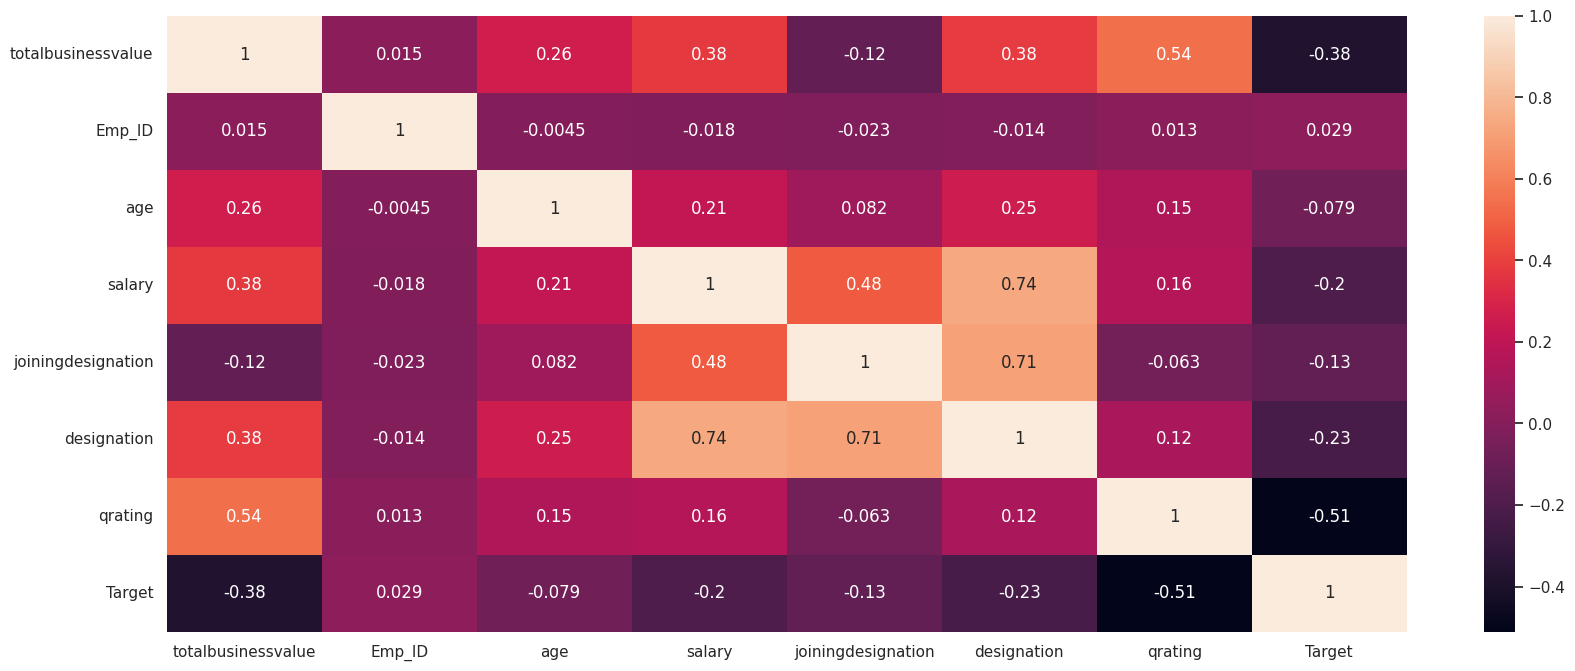

In [46]:
corr = final.corr()

plt.figure(figsize = (20,8))
sns.heatmap(corr,annot = True,cmap = 'rocket')

### 4. Data Visualization

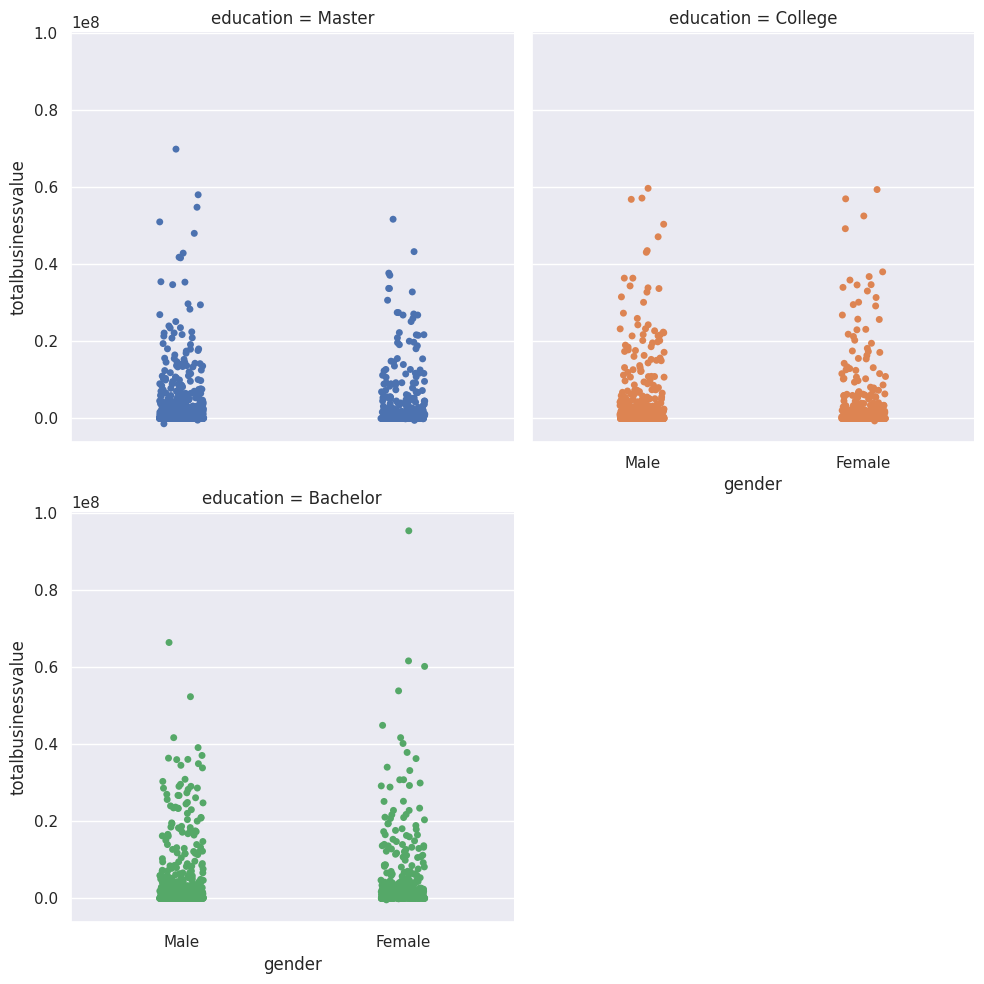

In [47]:
sns.catplot(x='gender', y='totalbusinessvalue', hue='education', data=final, col='education', col_wrap=2)

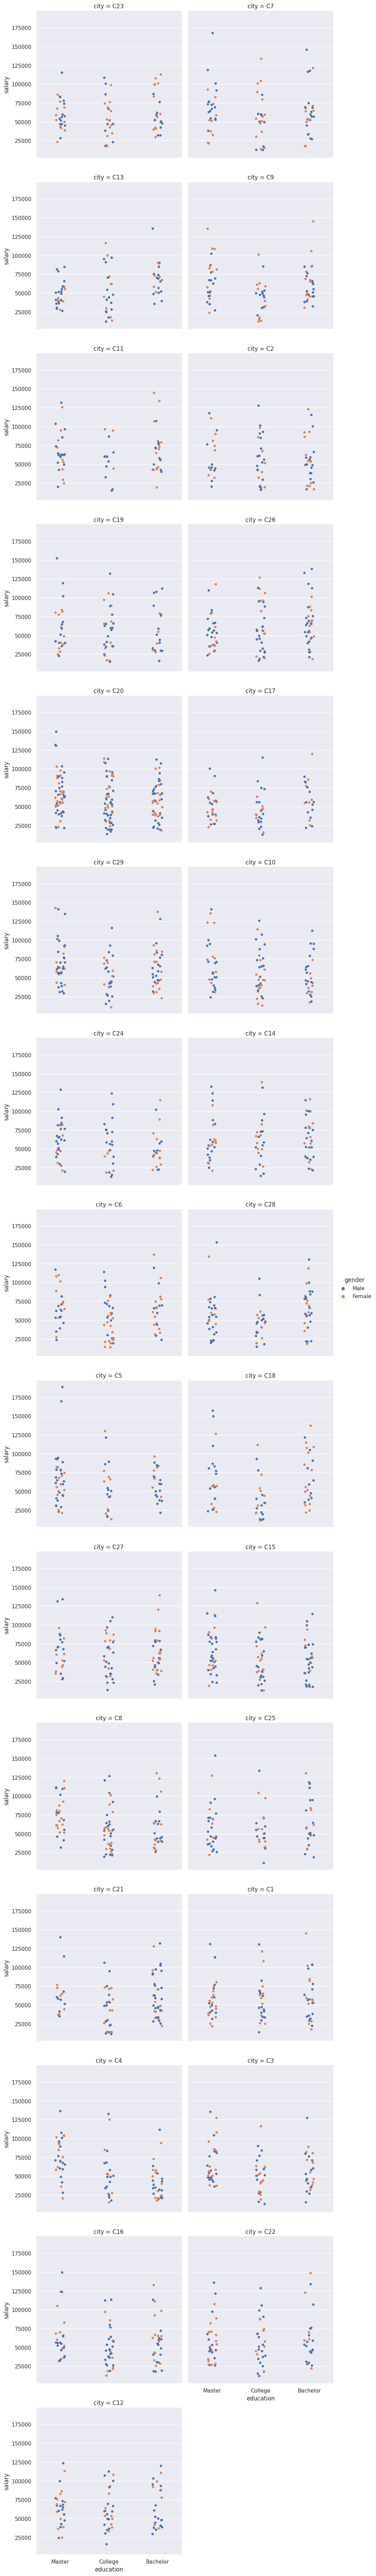

In [48]:
sns.catplot(x='education', y='salary', hue='gender', data=final, col='city', col_wrap=2)

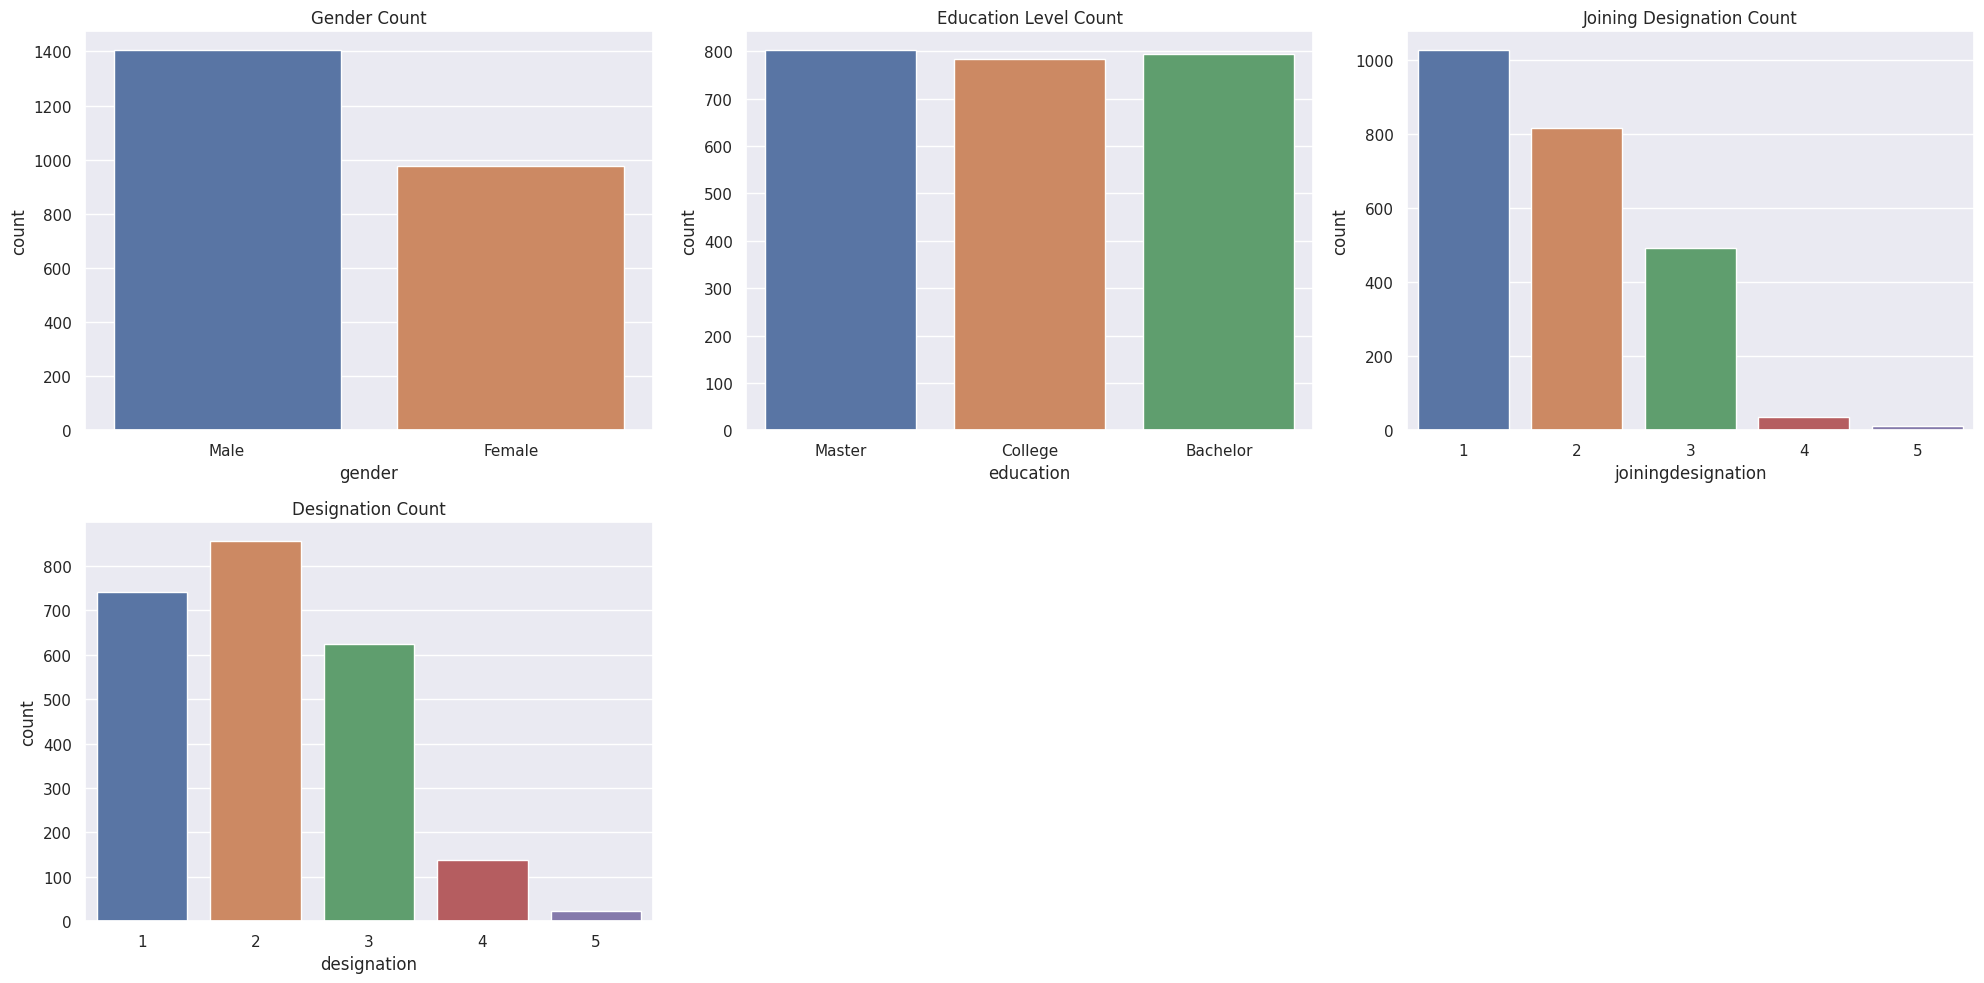

In [49]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Subplot 1: Gender Countplot
plt.subplot(231)
sns.countplot(x='gender', data=final)
plt.title('Gender Count')

# Subplot 2: Education Level Countplot
plt.subplot(232)
sns.countplot(x='education', data=final)
plt.title('Education Level Count')

# Subplot 3: Joining Designation Countplot
plt.subplot(233)
sns.countplot(x='joiningdesignation', data=final)
plt.title('Joining Designation Count')

# Subplot 4: Designation Countplot
plt.subplot(234)
sns.countplot(x='designation', data=final)
plt.title('Designation Count')

# Show the plots
plt.tight_layout()
plt.show()


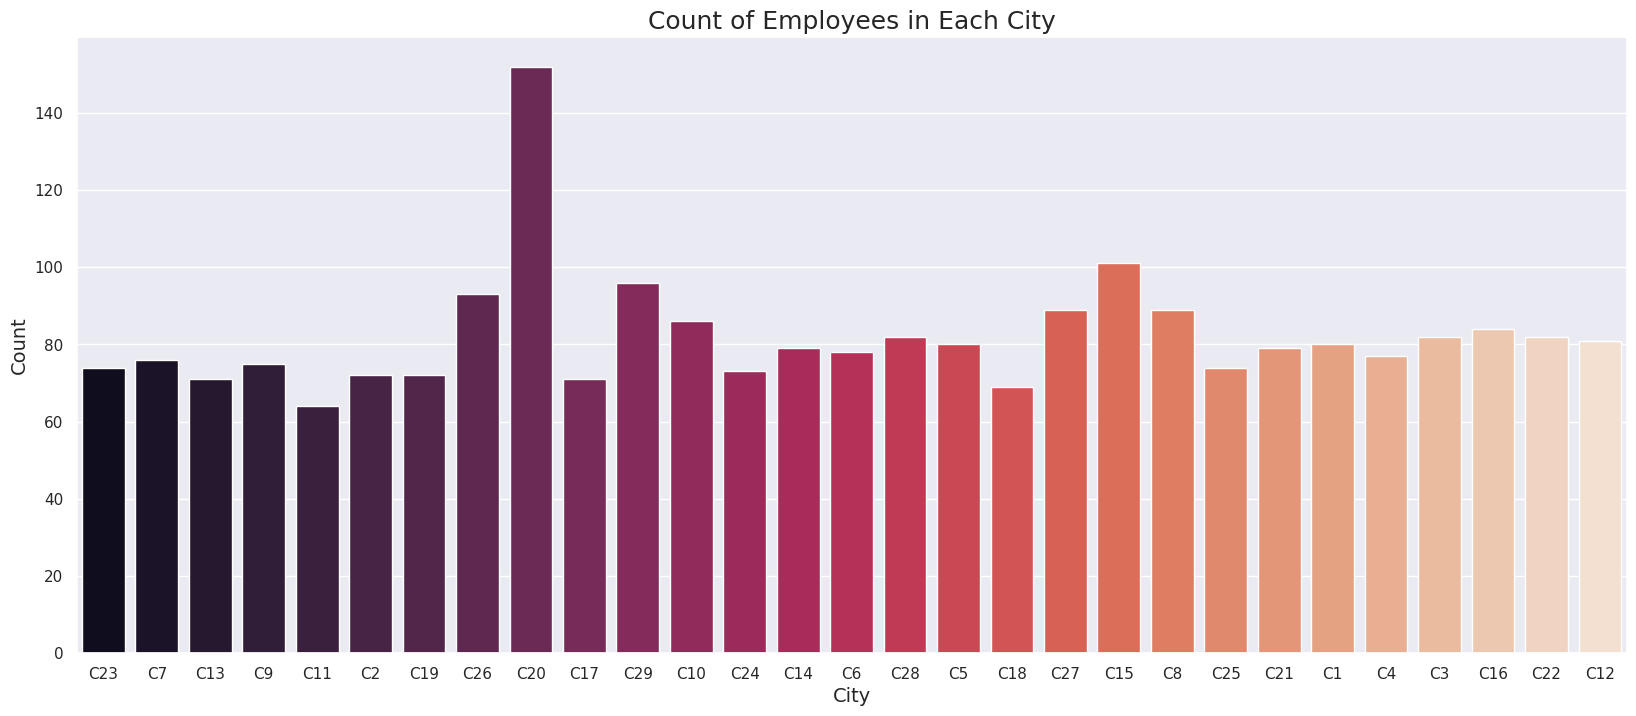

In [50]:
# Set the figure size
plt.figure(figsize=(20, 8))

# City Countplot
sns.countplot(x='city', data=final, palette='rocket')

# Set plot title and labels
plt.title('Count of Employees in Each City', fontsize=18)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


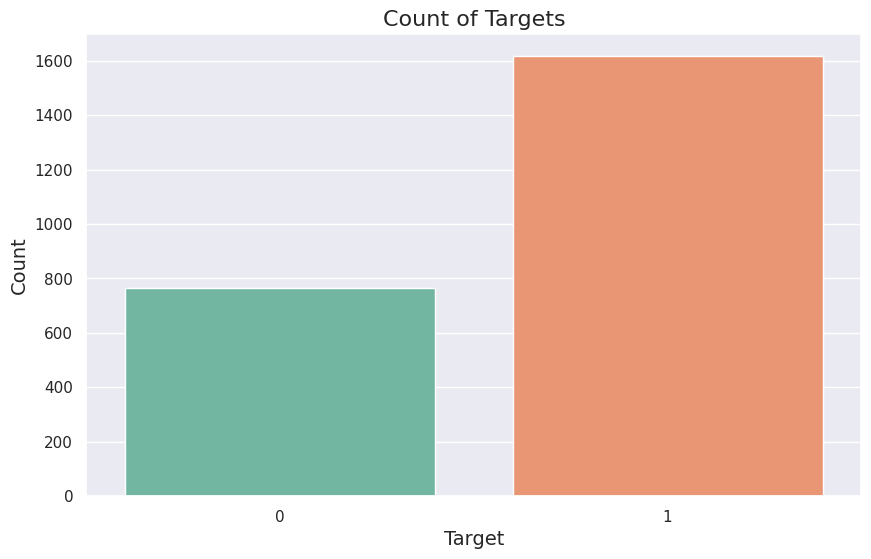

In [51]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the count plot for the 'Target' column
sns.countplot(x='Target', data=final, palette='Set2')

# Set plot title and labels
plt.title('Count of Targets', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


In [52]:
final['qrating'].unique()

array([2, 1, 4, 3])

In [53]:
final ['gender'] = pd.get_dummies(final['gender'],drop_first = True)
final

,totalbusinessvalue,Emp_ID,age,gender,city,education,salary,joiningdesignation,designation,qrating,Target
0,1715580,1,28,1,C23,Master,57387,1,1,2,1
1,0,2,31,1,C7,Master,67016,2,2,1,0
2,350000,4,43,1,C13,Master,65603,2,2,1,1
3,120360,5,29,1,C9,College,46368,1,1,1,1
4,1265000,6,31,0,C11,Bachelor,78728,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,21748820,2784,34,1,C24,College,82815,2,3,4,0
2377,0,2785,34,0,C9,College,12105,1,1,1,1
2378,2815090,2786,45,1,C19,College,35370,2,2,1,1
2379,977830,2787,28,0,C20,Master,69498,1,1,1,1


In [54]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

final['city'] = label.fit_transform(final['city'])

final['education'] = label.fit_transform(final['education'])

In [55]:
final.head()

,totalbusinessvalue,Emp_ID,age,gender,city,education,salary,joiningdesignation,designation,qrating,Target
0,1715580,1,28,1,15,2,57387,1,1,2,1
1,0,2,31,1,26,2,67016,2,2,1,0
2,350000,4,43,1,4,2,65603,2,2,1,1
3,120360,5,29,1,28,1,46368,1,1,1,1
4,1265000,6,31,0,2,0,78728,3,3,2,0


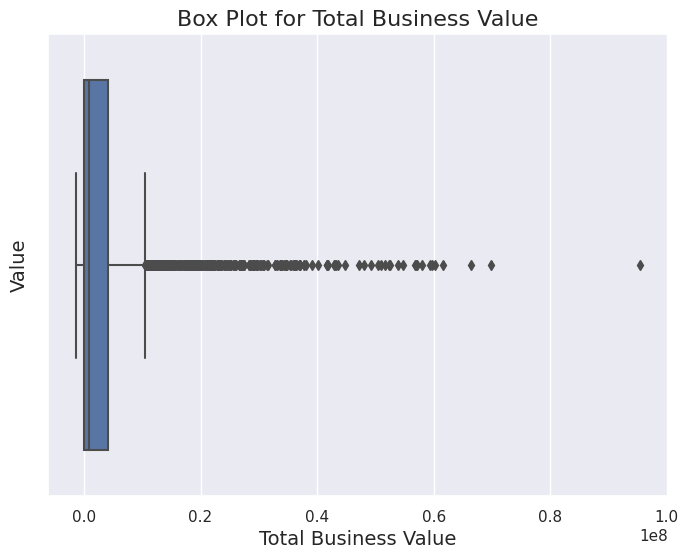

In [56]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the box plot for the 'Total Business Value' column
sns.boxplot(x='totalbusinessvalue', data=final)

# Set plot title and labels
plt.title('Box Plot for Total Business Value', fontsize=16)
plt.xlabel('Total Business Value', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Show the plot
plt.show()


In [57]:
Q1 = final['totalbusinessvalue'].quantile(0.25)
Q3 = final['totalbusinessvalue'].quantile(0.75)
IQR = Q3 - Q1

filter = (final['totalbusinessvalue'] >= Q1 - 1.5 * IQR) & (final['totalbusinessvalue']<= Q3 + 1.5 *IQR)
train1 = final.loc[filter]
print("data loss percentage {}%".format(((len(final) - len(train1))/len(final))*100))

data loss percentage 14.111717765644688%


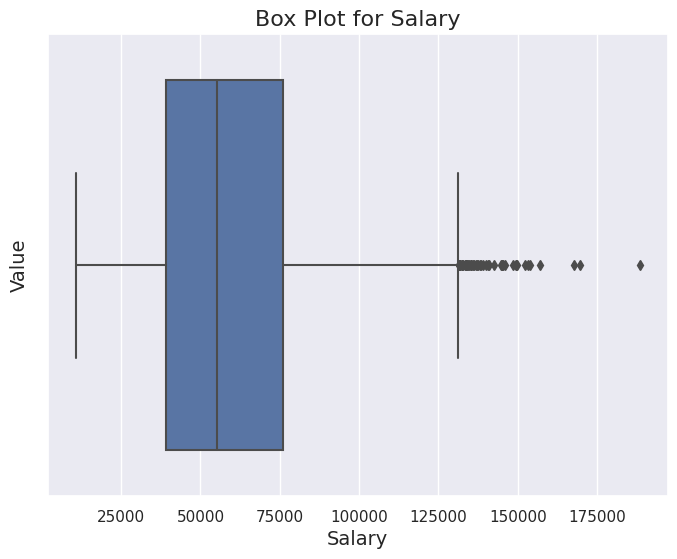

In [58]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create the box plot for the 'Salary' column
sns.boxplot(x='salary', data=final)

# Set plot title and labels
plt.title('Box Plot for Salary', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Show the plot
plt.show()

In [59]:
Q1 = final['salary'].quantile(0.25)
Q3 = final['salary'].quantile(0.75)
IQR = Q3 - Q1

filter = (final['salary'] >= Q1 - 1.5 * IQR) & (final['salary']<= Q3 + 1.5 *IQR)
train2 = final.loc[filter]
print("data loss percentage {}%".format(((len(final) - len(train2))/len(final))*100))

data loss percentage 2.015959680806384%


In [60]:
train2.shape

(2333, 11)

In [61]:
## Get the Fraud and the normal dataset

not_stay= (train2['Target']== 0 )

stay= (train2['Target']== 1 )

In [62]:
std_x = train2.loc[:,['totalbusinessvalue','age','gender','city','education','salary','joiningdesignation','designation','qrating']]
std_x.shape

(2333, 9)

In [63]:
y = train2.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Target, dtype: int64

In [64]:
from imblearn.under_sampling import NearMiss

# Implementing Undersampling for Handling Imbalanced
nm = NearMiss()
X_res,y_res=nm.fit_resample(std_x,y)

In [65]:
X_res.shape,y_res.shape

((1472, 9), (1472,))

### 5. Data Validation

In [66]:
from sklearn.model_selection import train_test_split

#Split data into Train and test format
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.25,random_state =105)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('shape of Test:{}'.format(x_test.shape))

Shape of Training Xs:(1104, 9)
shape of Test:(368, 9)


### 6. Model Building

In [34]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier


model = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = model.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 11.93it/s]

[LightGBM] [Info] Number of positive: 545, number of negative: 559
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 1104, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493659 -> initscore=-0.025364
[LightGBM] [Info] Start training from score -0.025364


In [67]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.82               0.81     0.81      0.82   
BernoulliNB                        0.82               0.81     0.81      0.82   
ExtraTreesClassifier               0.81               0.80     0.80      0.81   
LinearSVC                          0.81               0.80     0.80      0.80   
AdaBoostClassifier                 0.80               0.80     0.80      0.80   
SGDClassifier                      0.80               0.80     0.80      0.80   
CalibratedClassifierCV             0.80               0.80     0.80      0.80   
BaggingClassifier                  0.80               0.80     0.80      0.80   
LogisticRegression                 0.80               0.80     0.80      0.80   
GaussianNB                         0.80               0.79     0.79      0.79   
QuadraticDiscriminantAnalysi

In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
score = model.score(x_test,y_test)

In [69]:
print(score)

0.8315217391304348


### 7. Saving Model

In [70]:
# Save the model to a file using pickle
with open('predict_attrition.pkl', 'wb') as file:
    pickle.dump(model, file)

# Download the saved model file
from google.colab import files
files.download('predict_attrition.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 8. Confusion Matrix


In [71]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[130,  47],
       [ 15, 176]])

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81       177
           1       0.79      0.92      0.85       191

    accuracy                           0.83       368
   macro avg       0.84      0.83      0.83       368
weighted avg       0.84      0.83      0.83       368



In [73]:
test = pd.read_csv('test_data.csv')

test.shape

(741, 1)

In [74]:
test_f = pd.merge(test,final,on = 'Emp_ID')
test_f

,Emp_ID,totalbusinessvalue,age,gender,city,education,salary,joiningdesignation,designation,qrating,Target
0,394,27458220,34,0,12,2,97722,2,4,3,0
1,173,19866290,39,1,20,1,56174,1,3,3,0
2,1090,50382490,39,1,4,1,96750,2,4,2,0
3,840,17134040,40,0,27,1,88813,1,4,2,0
4,308,58024490,32,1,24,2,188418,2,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...
736,2134,59696450,40,1,21,1,116006,2,5,1,0
737,2255,36398090,40,1,17,1,133489,3,4,3,0
738,448,30318780,37,1,1,0,65389,2,4,3,0
739,1644,28842760,48,0,28,0,105513,2,4,1,0


### 9. Prediction on Test Data

In [75]:
test_final = test_f.drop(['Emp_ID','Target'],axis = 1)
test_final

,totalbusinessvalue,age,gender,city,education,salary,joiningdesignation,designation,qrating
0,27458220,34,0,12,2,97722,2,4,3
1,19866290,39,1,20,1,56174,1,3,3
2,50382490,39,1,4,1,96750,2,4,2
3,17134040,40,0,27,1,88813,1,4,2
4,58024490,32,1,24,2,188418,2,5,2
...,...,...,...,...,...,...,...,...,...
736,59696450,40,1,21,1,116006,2,5,1
737,36398090,40,1,17,1,133489,3,4,3
738,30318780,37,1,1,0,65389,2,4,3
739,28842760,48,0,28,0,105513,2,4,1


In [76]:
test_predicted = model.predict(test_final)
test_predicted.shape

(741,)

In [77]:
submission=pd.read_csv('sample_submission.csv')

submission

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,0


In [78]:
submission['Target']=test_predicted


submission.to_csv('Random_forest.csv',index=False)